# Examples for LLSSurvey (v2)

In [13]:
%matplotlib notebook

In [14]:
# imports
import seaborn as sns; sns.set_style("white")
import numpy as np
from matplotlib import pyplot as plt

import imp
import h5py

from linetools import utils as ltu

from pyigm.surveys.llssurvey import LLSSurvey
from pyigm.surveys import llssurvey as llss
from pyigm.abssys.igmsys import AbsSubSystem
from pyigm.abssys.lls import LLSSystem
from pyigm.abssys import lls as pylls
from pyigm.surveys import lls_literature as llit

## HD-LLS (Prochaska+15, ApJS, 221, 22)

### Simple Init

In [2]:
# Includes metallicity PDFs from Fumagalli+16
hdlls = llss.LLSSurvey.load_HDLLS(load_sys=False)
hdlls

HD-LLS: Loading summary file /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_DR1.fits
HD-LLS: Loading ions file /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_ions.json
HD-LLS: Loading metallicity file /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_DR1_dustnhi.hdf5
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Done!


<IGMSurvey: nsys=157, type=LLS, ref=HD-LLS>

### With Systems (takes ~30s)

In [3]:
hdlls = LLSSurvey.load_HDLLS()
hdlls

HD-LLS: Loading summary file /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_DR1.fits
HD-LLS: Loading ions file /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_ions.json
HD-LLS: Loading metallicity file /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_DR1_dustnhi.hdf5
Loading systems from /home/xavier/local/Python/pyigm/pyigm/data/LLS/HD-LLS/HD-LLS_sys.tar.gz
Skipping a likely folder: SYS
Building the data Table from the internal dict
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Starting the AbsSystem build for the _dict.  Be patient..


/home/xavier/local/Python/linetools/linetools/spectralline.py:119: UserWarning: Key Id not in your input dict
  warnings.warn("Key {:s} not in your input dict".format(key))
/home/xavier/local/Python/linetools/linetools/spectralline.py:119: UserWarning: Key f not in your input dict
  warnings.warn("Key {:s} not in your input dict".format(key))
/home/xavier/local/Python/linetools/linetools/isgm/utils.py:543: UserWarning: Use table_from_complist instead!!
  warnings.warn("Use table_from_complist instead!!")
/home/xavier/local/Python/linetools/linetools/isgm/abscomponent.py:393: UserWarning: No stars provided.  Adding one because Ej > 0.
  warnings.warn("No stars provided.  Adding one because Ej > 0.")


Done!


<IGMSurvey: nsys=157, type=LLS, ref=HD-LLS>

### Simple Attributes

In [4]:
hdlls.nsys

157

In [5]:
hdlls.NHI[0:10]

array([ 19.65,  20.05,  17.55,  19.1 ,  20.  ,  19.05,  19.1 ,  19.05,
        19.25,  20.2 ])

In [6]:
hdlls.name[0:5]

array(['J000345-232346.5_z2.187', 'J003454.8+163920_z3.754',
       'J004049.5-402514_z2.816', 'J010355.3-300946_z2.908',
       'J010516.8-184642_z2.927'],
      dtype='<U27')

## Ion info

In [7]:
hdlls._abs_sys[77]._ionN

RA,DEC,comp_name,z_comp,Z,ion,Ej,vmin,vmax,ion_name,flag_N,logN,sig_logN [2],b,sig_b,vel,sig_vel,comment,reliability
deg,deg,,,,,1 / cm,km / s,km / s,,,,,km / s,km / s,km / s,km / s,,
float64,float64,str14,float64,int64,int64,float64,float64,float64,str5,int64,float64,float64,float64,float64,float64,float64,str1,str4
179.777,13.6271388889,AlIII_z3.72300,3.723,13,3,0.0,-153.0,223.0,AlIII,3,12.471,0.0 .. 0.0,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,AlII_z3.72300,3.723,13,2,0.0,-153.0,223.0,AlII,1,12.742,0.027 .. 0.027,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,CII*_z3.72300,3.723,6,2,63.42,-77.0,223.0,CII,0,0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,CII_z3.72300,3.723,6,2,0.0,-153.0,223.0,CII,2,14.68,0.01 .. 0.01,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,CIV_z3.72300,3.723,6,4,0.0,-153.0,223.0,CIV,1,13.906,0.021 .. 0.021,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,CI_z3.72300,3.723,6,1,0.0,-153.0,223.0,CI,3,13.061,0.0 .. 0.0,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,CrII_z3.72300,3.723,24,2,0.0,-153.0,223.0,CrII,3,13.42,0.0 .. 0.0,0.0,0.0,0.0,0.0,,none
179.777,13.6271388889,NiII_z3.72300,3.723,28,2,0.0,-153.0,223.0,NiII,3,13.472,0.0 .. 0.0,0.0,0.0,0.0,0.0,,none


In [8]:
CII_clms = hdlls.ions((6,2))
#CII_clms[70:80]

/home/xavier/local/Python/pyigm/pyigm/surveys/igmsurvey.py:500: UserWarning: Two components for ion (6, 2) for system <LLSSystem: J113418.96+574204.7_z3.410 11:34:18.96 +57:42:04.7, zabs=3.41, logNHI=17.9743, tau_LL=5.97492, [Z/H]=0 dex>.  Taking the first one
  warnings.warn("Two components for ion {} for system {}.  Taking the first one".format(Zion, abs_sys))
/home/xavier/local/Python/pyigm/pyigm/surveys/igmsurvey.py:500: UserWarning: Two components for ion (6, 2) for system <LLSSystem: J200324.1-325144_z3.188 20:03:24.1 -32:51:44, zabs=3.1879, logNHI=19.879, tau_LL=479.769, [Z/H]=0 dex>.  Taking the first one
  warnings.warn("Two components for ion {} for system {}.  Taking the first one".format(Zion, abs_sys))
/home/xavier/local/Python/pyigm/pyigm/surveys/igmsurvey.py:500: UserWarning: Two components for ion (6, 2) for system <LLSSystem: J200324.1-325144_z3.548 20:03:24.1 -32:51:44, zabs=3.54791, logNHI=18.0281, tau_LL=6.76288, [Z/H]=0 dex>.  Taking the first one
  warnings.warn("

In [11]:
gdCII = CII_clms['flag_N']>0
np.sum(gdCII) 

103

### Simple Plot

#### NHI

<IPython.core.display.Javascript object>


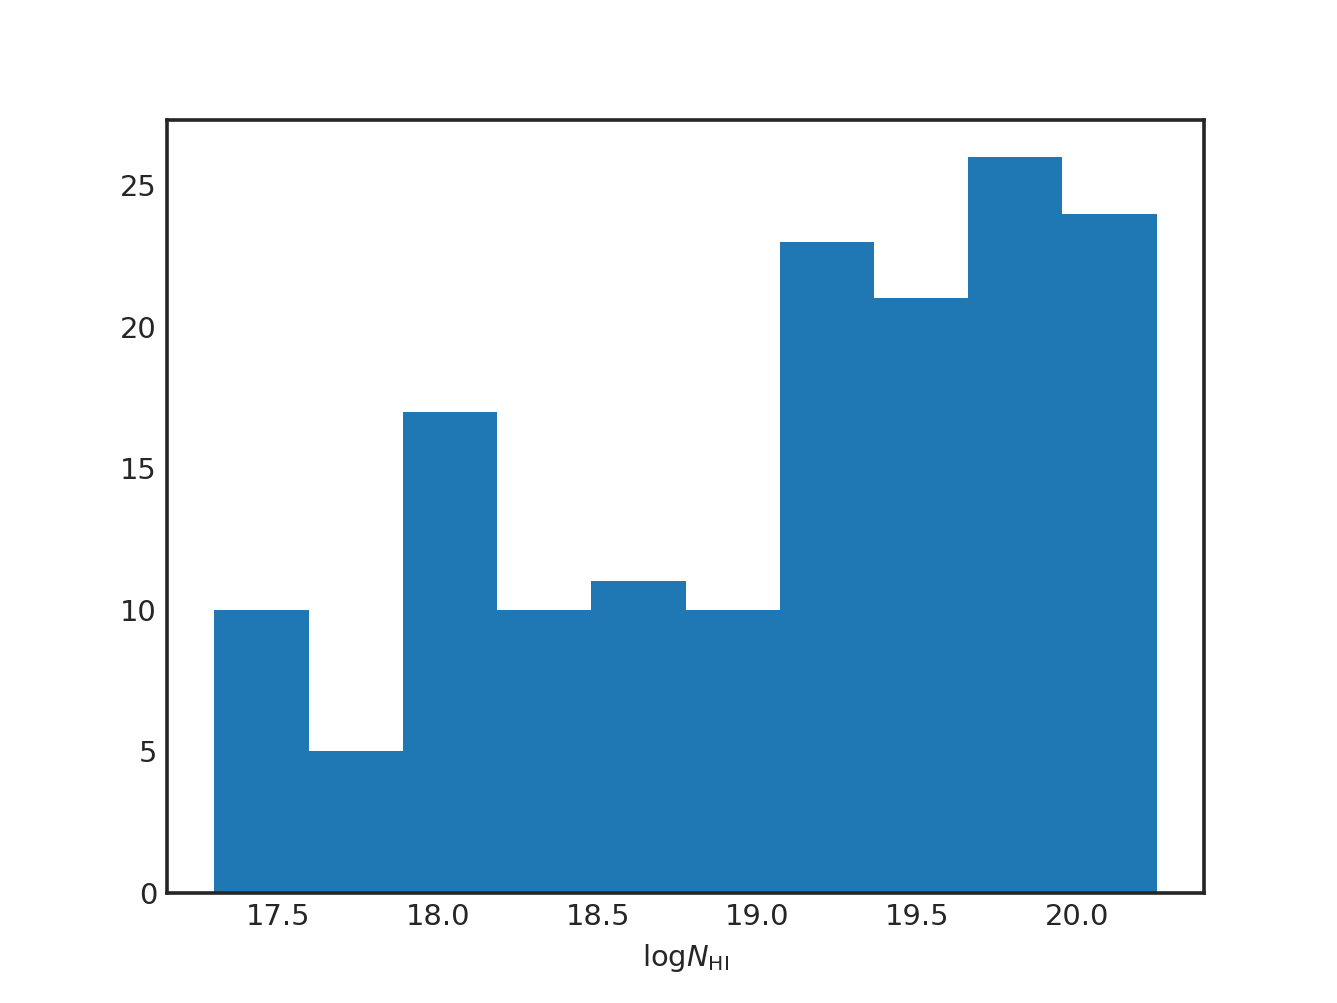

In [18]:
plt.clf()
ax=plt.gca()
ax.hist(hdlls.NHI)
ax.set_xlabel(r'$\log N_{\rm HI}$')
plt.show()

<IPython.core.display.Javascript object>


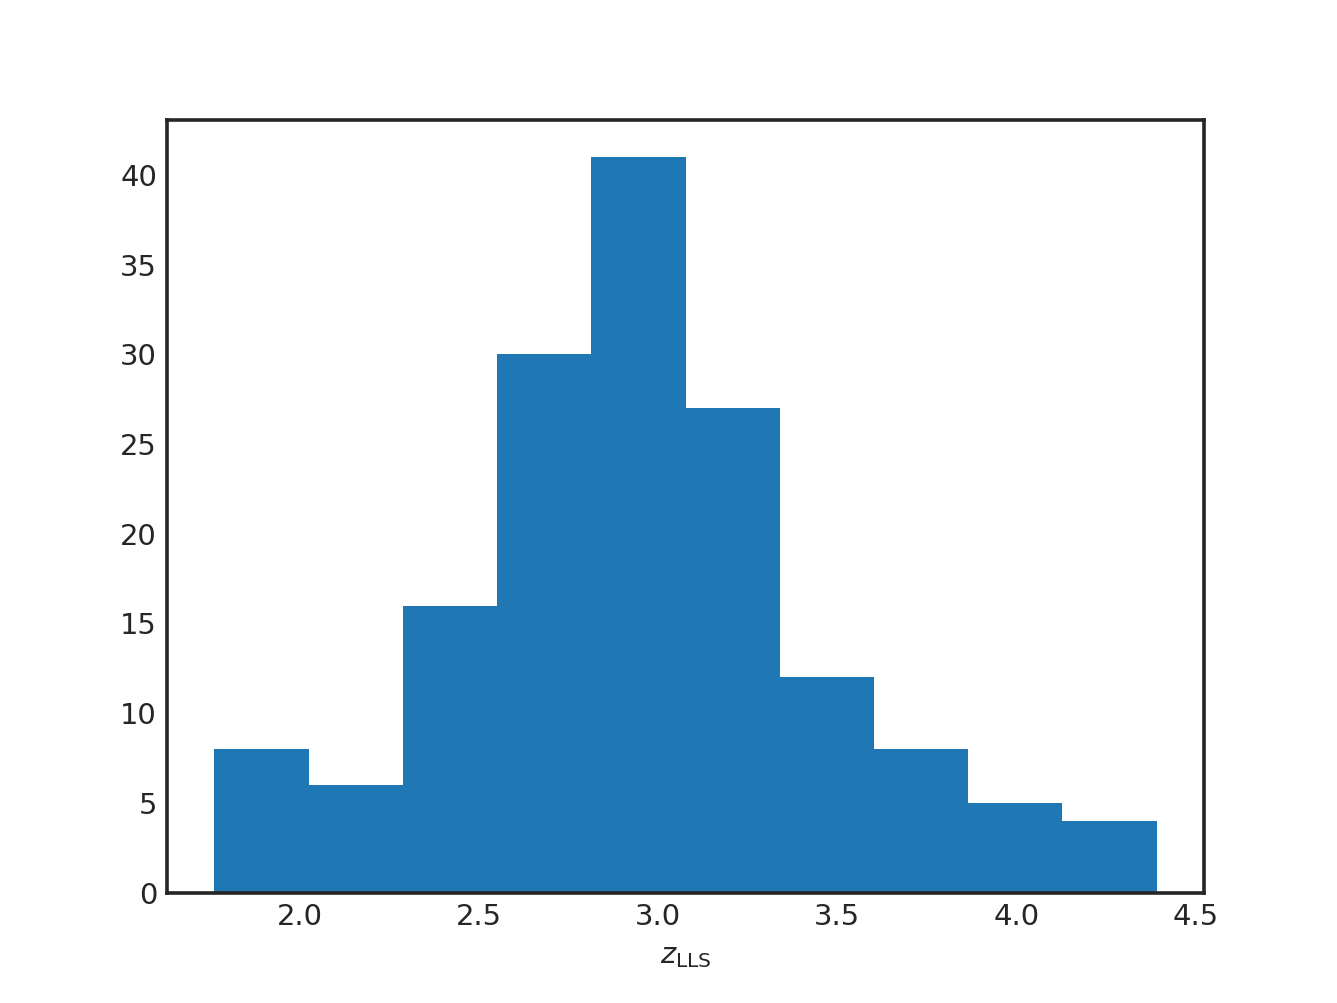

In [19]:
plt.clf()
ax=plt.gca()
ax.hist(hdlls.zabs)
ax.set_xlabel(r'$z_{\rm LLS}$')
plt.show()

----

### Metallicity PDFs (Fumagalli+16, MNRAS, 455, 4100)

In [21]:
print('Mean metallicity of {} is {}'.format(hdlls._abs_sys[0], hdlls._abs_sys[0].metallicity.meanZH))

Mean metallicity of <LLSSystem: J000345-232346.5_z2.187 00:03:45 -23:23:46.5, zabs=2.1871, logNHI=19.65, tau_LL=283.16, [Z/H]=0 dex> is -1.4731487068965432


## SDSS LLS (Prochaska+10, ApJ, 718, 391)

### All

In [22]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /home/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [23]:
sdss_dr7_all.sightlines[0:5]

DR,PLATE,FIBER,MJD,RA,DEC,IMAG,U,UG,GR,SNR,FLG_LLS,FLG_EXTRA,LLS_FLUX,ZT2,ZT0,ZLLS,ZEM,FLG_QSO
str3,int32,int32,int32,float64,float64,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,int16
DR7,1187,324,52708,129.1273,6.3457866,19.8499,23.6163,2.88079,0.763817,1.46418,3,0,0.0,3.45469,4.81323,0.0,3.40001,0
DR7,1697,44,53142,199.16685,10.982457,20.1359,25.715,4.93595,0.562878,1.52782,2,0,0.0,3.45469,4.79319,0.0,3.40006,0
DR7,1291,182,52735,226.38853,41.329546,19.1578,23.7557,3.8441,0.631777,2.45875,2,0,0.0452141,3.44956,3.90137,3.30447,3.40018,0
DR7,1742,292,53053,145.02499,10.988845,19.522,24.9317,4.601,0.613277,1.33537,3,0,0.0,3.45469,4.75993,0.0,3.40044,0
DR7,2137,599,54206,220.78203,28.0573,19.8515,25.7578,5.3715,0.449001,1.64206,4,0,0.0,3.45469,4.76126,0.0,3.4006,0


### Stat

In [24]:
sdss_dr7_stat = LLSSurvey.load_SDSS_DR7()

SDSS-DR7: Loading LLS file /home/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz
SDSS-DR7: Performing stats (~60s)
SDSS-DR7: Loaded


In [25]:
len(sdss_dr7_stat.NHI)

254

### Sky Map

In [26]:
all_coord = sdss_dr7_all.coord
stat_coord = sdss_dr7_stat.coord

<IPython.core.display.Javascript object>


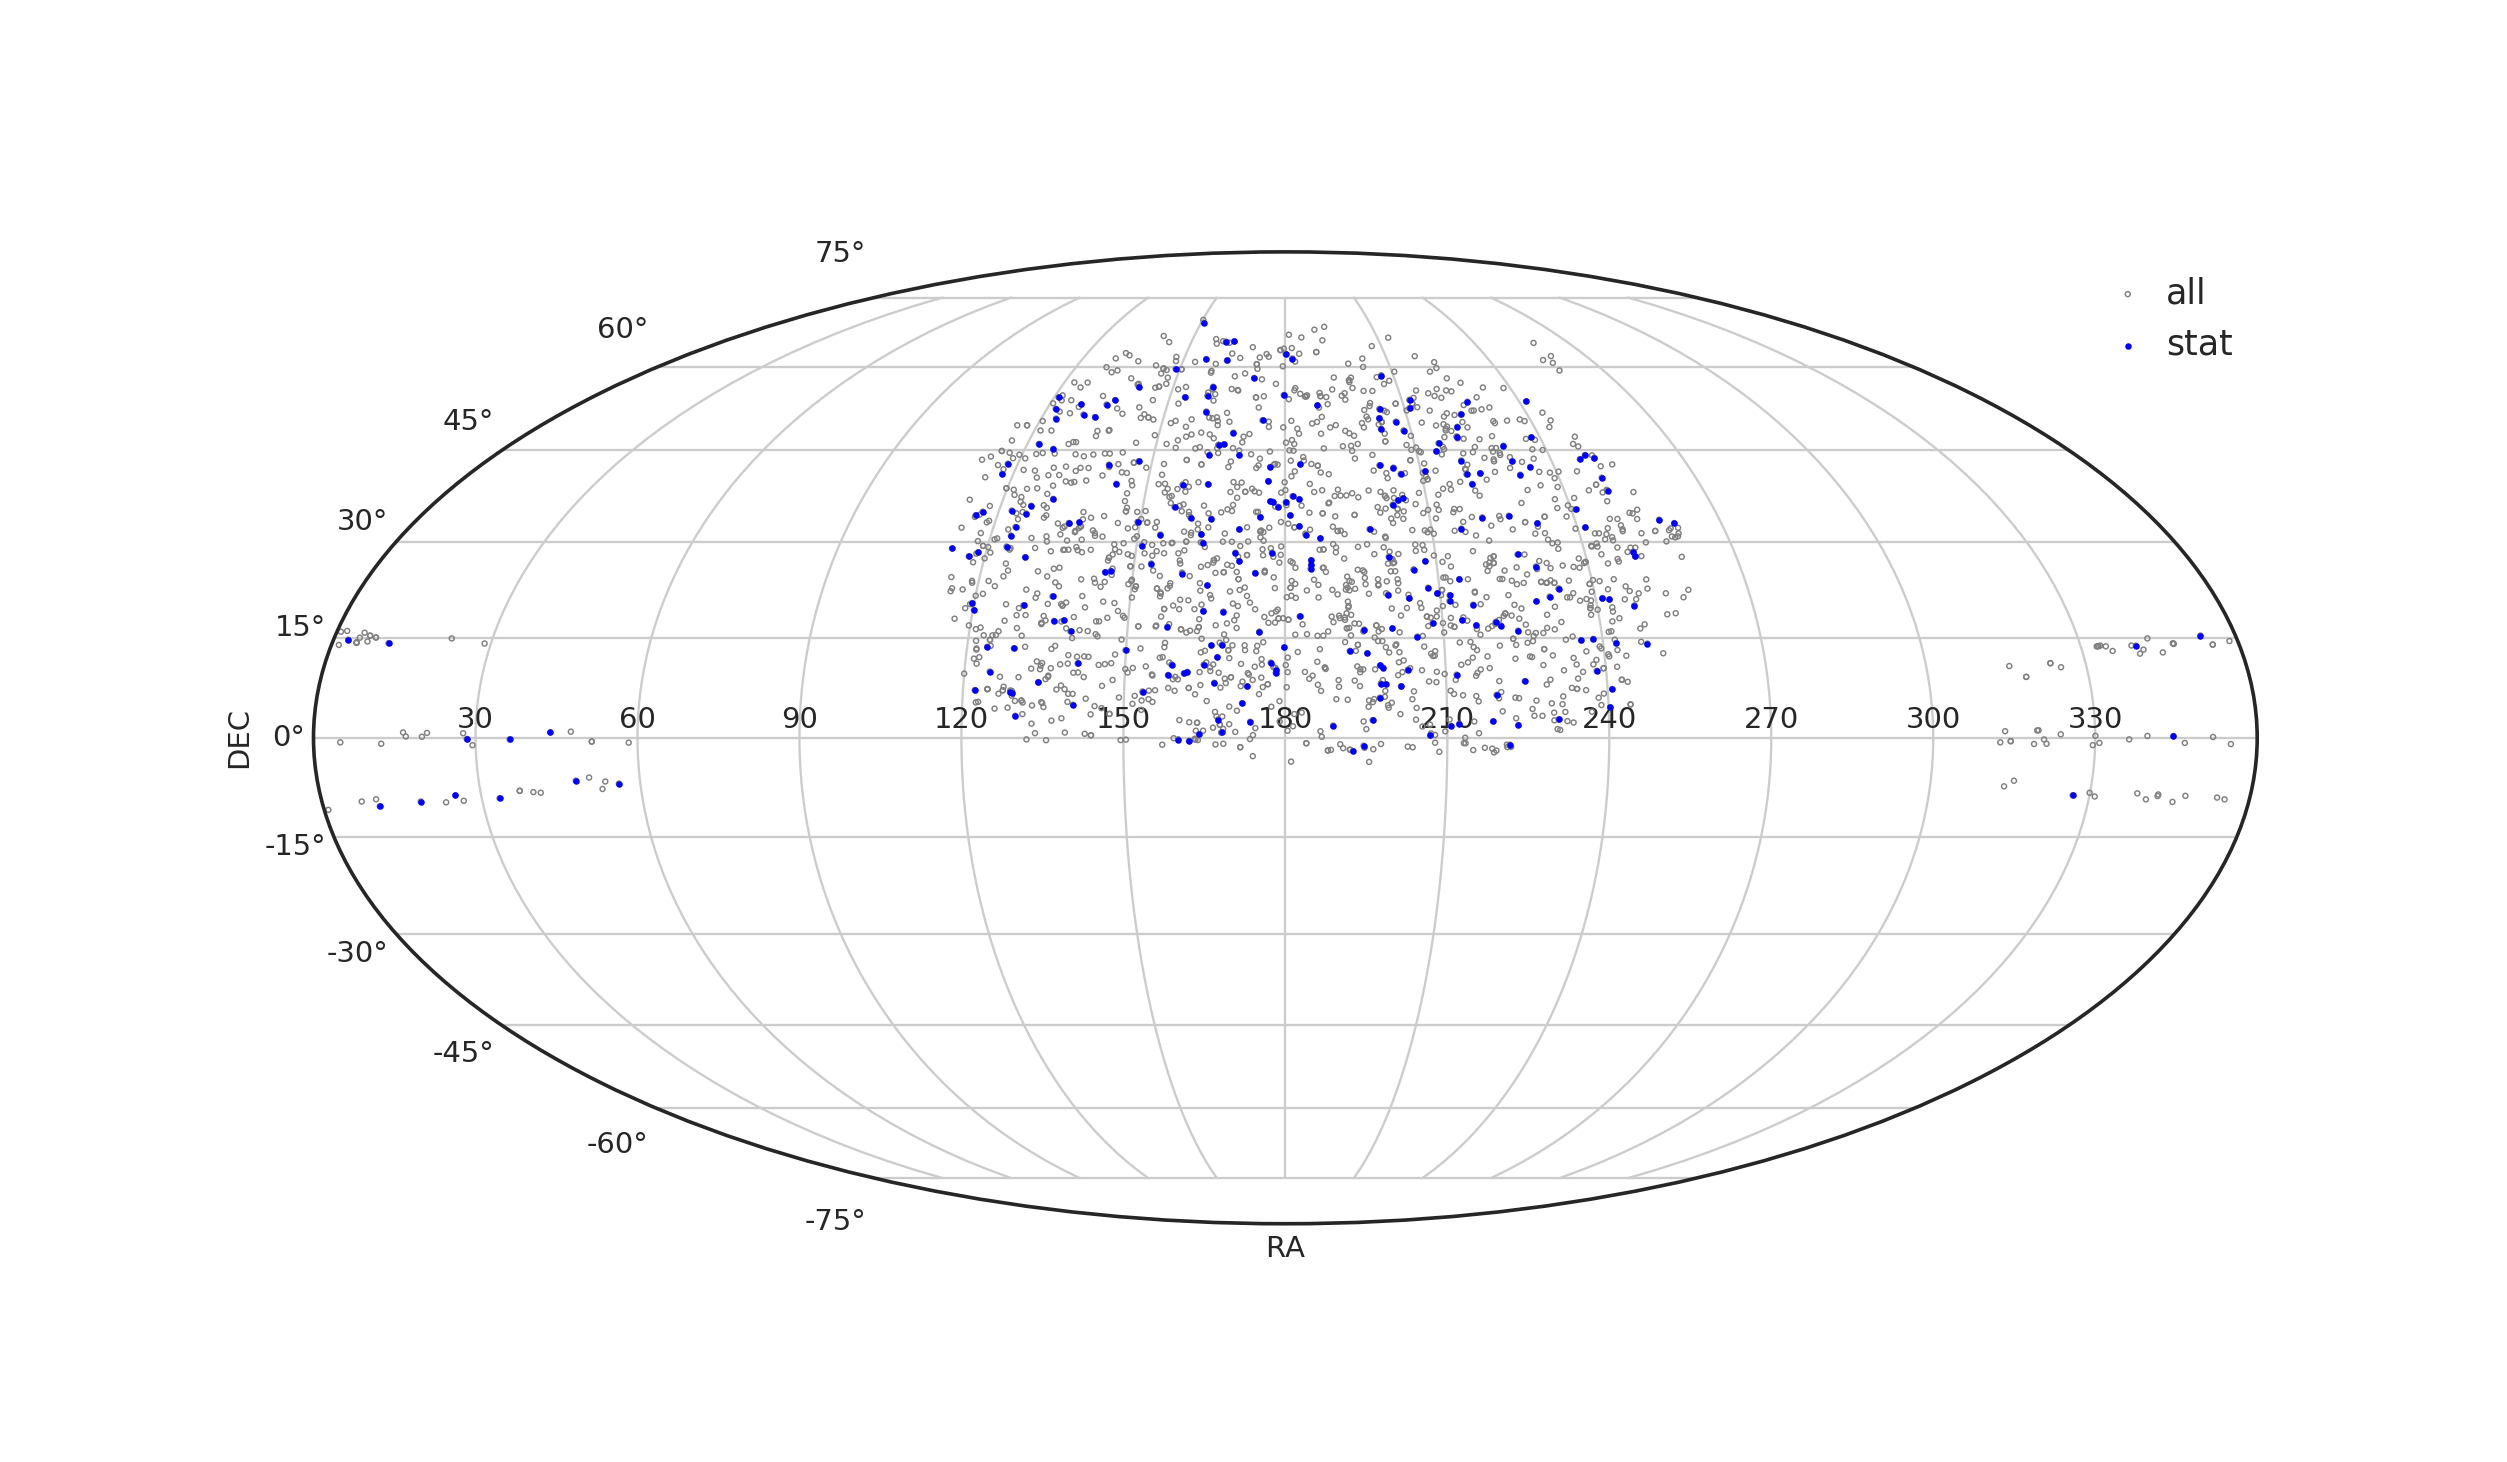

/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [27]:
plt.figure(figsize=(12, 7))
plt.clf()
# Setup
ax = plt.axes(projection='mollweide')
ax = plt.axes()
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_xticklabels(np.arange(30,331,30))
ax.grid(True)
# All
plt.scatter((all_coord.ra.value-180.)*np.pi/180., all_coord.dec.value*np.pi/180.,
            marker='o', s=3., lw=0.5, edgecolors='gray', facecolors='none', 
            label='all')
# Stat
plt.scatter((stat_coord.ra.value-180.)*np.pi/180., stat_coord.dec.value*np.pi/180.,
            marker='o', s=3., lw=0.5, edgecolors='blue', facecolors='blue', 
            label='stat')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                        handletextpad=0.1, fontsize='large')
plt.show()

----

## $z \sim 2.5$ HST (O'Meara et al. 2013, ApJ, 765, 137)

### ACS

In [28]:
acs = LLSSurvey.load_HST_ACS()
acs

HST-ACS: Loaded


<IGMSurvey: nsys=34, type=LLS, ref=HST-ACS, nsightlines=18>

### WFC3

In [29]:
wfc3 = LLSSurvey.load_HST_WFC3()
wfc3

HST-WFC3: Loaded


<IGMSurvey: nsys=91, type=LLS, ref=HST-WFC3, nsightlines=53>

### Combined

In [30]:
HST_LLS = wfc3 + acs
HST_LLS

<IGMSurvey: nsys=125, type=LLS, ref=HST-WFC3,HST-ACS, nsightlines=71>

----

##  $z \sim 3$  MagE  (Fumagalli et al. 2013, ApJ, 775, 78)

### Load

In [31]:
z3mage = LLSSurvey.load_mage_z3()
z3mage

<IGMSurvey: nsys=60, type=LLS, ref=z3_MagE, nsightlines=105>

In [32]:
z3mage_NC = LLSSurvey.load_mage_z3(sample='non-color')
z3mage_NC

<IGMSurvey: nsys=32, type=LLS, ref=z3_MagE, nsightlines=61>

### g(z) plot

In [33]:
zeval, gz = z3mage.calculate_gz()

In [34]:
zeval[4000], gz[4000]

(2.8705998897560931, 67)

<IPython.core.display.Javascript object>


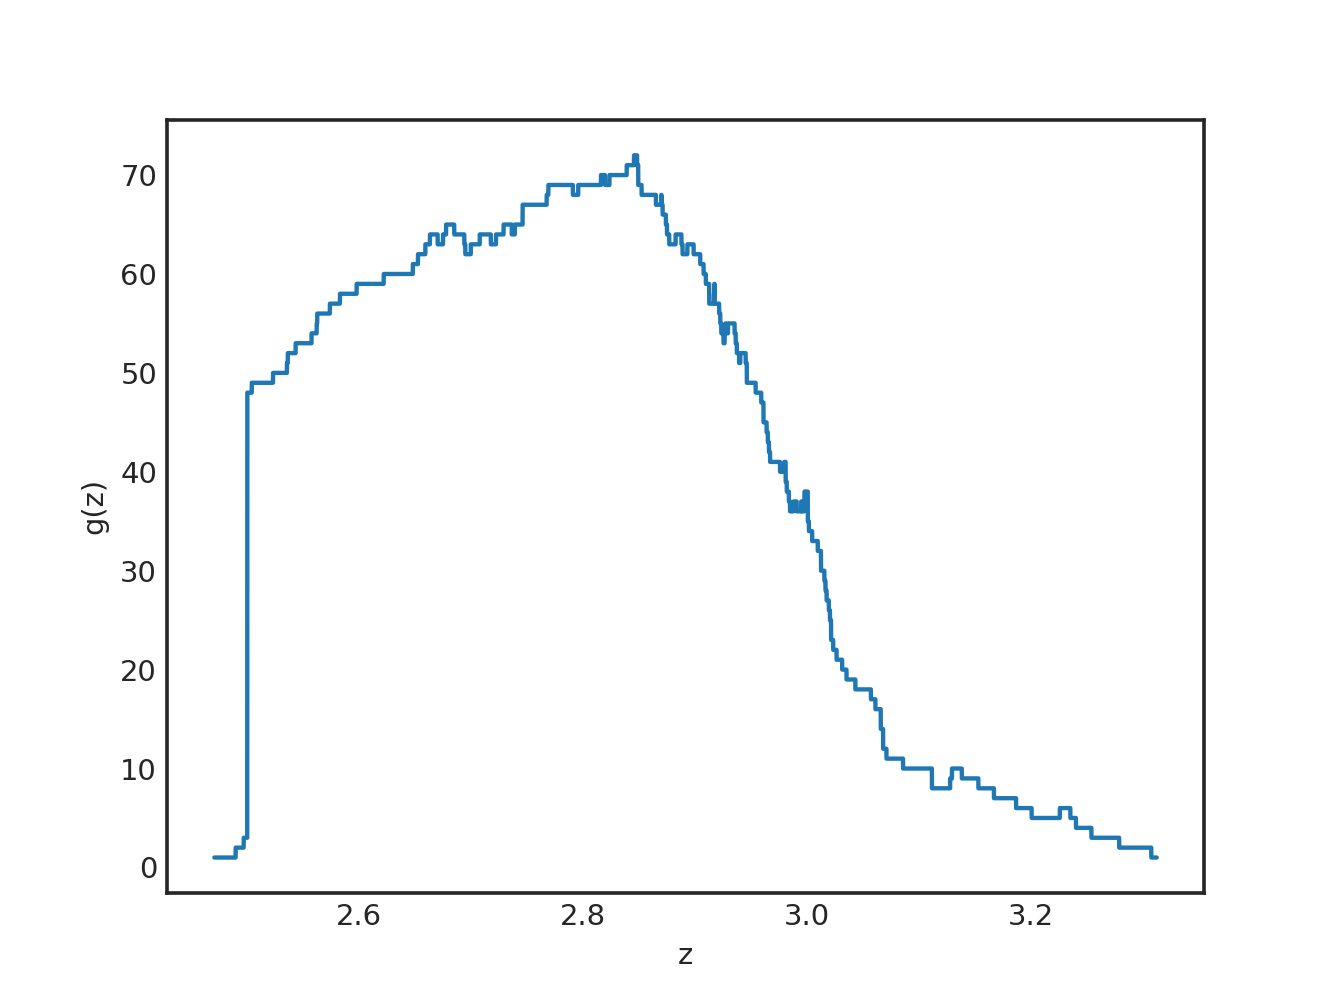

In [35]:
plt.clf()
plt.plot(zeval, gz)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

## Literature

In [36]:
from pyigm.surveys.lls_literature import log_sum

In [39]:
zonak04 = llit.zonak2004()
print(zonak04)
zonak04._ionN

<LLSSystem: PG1634+706_z1.041 16:34:28.9897 +70:31:32.422, zabs=1.0414, logNHI=17.23, tau_LL=1.07654, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
12.415294802,0.05,1,12,2
13.4329439428,0.170997184174,1,14,3
12.4473519121,0.129178793071,1,14,4


In [40]:
jenkins05 = llit.jenkins2005()
jenkins05._ionN

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
No error for N I
No error for O I
No error for O I


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
17.98,0.05,1,1,1
14.7,0.0,2,6,2
13.5,0.0,2,6,3
13.9,0.4,1,6,4
12.44,0.0,3,7,1
13.92,0.4,1,7,2
14.47,0.05,1,8,1
13.95,0.05,1,14,2
13.53,0.25,1,14,4


In [41]:
tripp05 = llit.tripp2005()
tripp05._ionN

logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
14.4059239514,0.075591125682,1,8,1
14.2673822193,0.263055215693,1,6,2
13.5066831639,0.0521636459228,1,14,2
13.43,0.11,1,26,2
13.28,0.0,3,7,1
13.36,0.0,3,6,4
12.88,0.0,3,14,4


In [42]:
peroux06a = llit.peroux06a()
print(peroux06a)
peroux06a._ionN


<LLSSystem: SDSSJ0134+0051_z0.842 01:34:05.75 +00:51:09.4, zabs=0.842, logNHI=19.93, tau_LL=539.55, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
12.2347702952,0.0333114495397,1,12,1
13.6989700043,0.0,2,12,2
14.4774468535,0.0165813621851,1,26,2
12.0878283736,0.0,3,30,2
12.6380948725,0.0,3,24,2


In [43]:
peroux06b = llit.peroux06b()
print(peroux06b)
peroux06b._ionN

<LLSSystem: SDSSJ1323-0021_z0.716 13:23:23.78 -00:21:55.2, zabs=0.716, logNHI=20.21, tau_LL=1028.09, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
13.2627950666,0.0129070876912,1,12,1
15.1537904822,0.0,2,12,2
15.1549410447,0.0260564242229,1,26,2
13.4082908562,0.044243954439,1,30,2
13.0820669343,0.161460798648,1,24,2
13.3100982719,0.0187835949381,1,25,2
12.4092739152,0.0656476491959,1,22,2


In [44]:
meiring06 = llit.meiring06()
print(meiring06)
meiring06._ionN

<LLSSystem: SDSSJ1107+0003_z0.954 11:07:36.6552 +00:03:28.62, zabs=0.9542, logNHI=20.26, tau_LL=1153.54, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
12.08,0.0,3,30,2
13.01,0.0,3,22,2
12.76,0.0,3,24,2


In [45]:
meiring07 = llit.meiring07()
for imeiring07 in meiring07:
    print(imeiring07)
    print(imeiring07._ionN)

<LLSSystem: Q0354-2724z_1.405 03:54:05.9 -27:24:25.7, zabs=1.4051, logNHI=20.18, tau_LL=959.471, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1  12.7     0.01
     2  12   2 14.39      0.0
     1  24   2 13.25     0.04
     1  25   2 12.82     0.03
     1  26   2 15.03     0.01
<LLSSystem: Q0826-2230z_0.911 08:26:01.5 -22:30:26.2, zabs=0.911, logNHI=19.04, tau_LL=69.5075, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1 12.06     0.02
     2  12   2 13.71      0.0
     1  20   2 11.42     0.04
     1  26   2 13.43     0.12
<LLSSystem: Q1009-0026z_0.843 10:09:30.4 -00:26:19.1, zabs=0.8426, logNHI=20.2, tau_LL=1004.69, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1  11.8     0.05
     2  12   2 13.87      0.0
     1  13   3 12.74     0.03
     1  25   2 12.28     0.04
     1  26   2 14.37     0.03
<LLSSystem: Q1009-0026z_0.887 10:09:30.4 -00:26:19.1, zabs=0.8866, logNH

In [46]:
meiring08 = llit.meiring08()
for imeiring08 in meiring08:
    print(imeiring08)
    print(imeiring08._ionN)

<LLSSystem: Q1037+0028z_1.424 10:37:44.4 +00:28:09.2, zabs=1.4244, logNHI=20.04, tau_LL=695.075, [Z/H]=0 dex>
sig_logN flag_N  Z  ion  logN
-------- ------ --- --- -----
     0.0      2  12   2 14.44
     0.0      2  13   2  13.6
    0.03      1  13   3 13.15
    0.05      1  14   2 15.05
    0.11      1  25   2 12.57
    0.09      1  26   2 14.96
<LLSSystem: Q1054-0020z_0.830 10:54:40.98 -00:20:48.4, zabs=0.8301, logNHI=18.95, tau_LL=56.4979, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1 12.54     0.02
     2  12   2  14.3      0.0
     1  13   3 13.65     0.04
     1  25   2 12.31      0.1
     1  26   2 14.35     0.01
<LLSSystem: Q1054-0020z_0.951 10:54:40.98 -00:20:48.4, zabs=0.9514, logNHI=19.28, tau_LL=120.79, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1 12.04     0.07
     2  12   2 13.59      0.0
     1  26   2 13.49     0.08
<LLSSystem: Q1215-0034z_1.554 12:15:49.81 -00:34:32.1, zabs=1.5543, l

In [47]:
nestor08 = llit.nestor08()
print(nestor08)
nestor08._ionN

<LLSSystem: SDSSJ2151+2130_z1.002 21:51:45.8304 +21:30:13.5, zabs=1.0023, logNHI=19.3, tau_LL=126.483, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
12.13,0.0,3,30,2
12.59,0.0,3,24,2


In [48]:
meiring09 = llit.meiring09()
for imeiring09 in meiring09:
    print(imeiring09)
    print(imeiring09._ionN)

<LLSSystem: Q0005+0524z_0.851 00:05:20.21 +05:24:10.8, zabs=0.8514, logNHI=19.08, tau_LL=76.2135, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1 12.24     0.04
     2  12   2 14.13      0.0
     1  13   3 13.13     0.06
     1  26   2 13.75     0.02
<LLSSystem: Q0012$-$0122z_1.386 00:12:10.89 -01:22:07.5, zabs=1.3862, logNHI=20.26, tau_LL=1153.54, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1 11.75     0.05
     2  12   2 13.81      0.0
     2  13   2 13.07      0.0
     1  13   3 12.83     0.04
     1  14   2 14.45     0.04
     1  26   2 14.25     0.01
<LLSSystem: Q0021+0104z_1.326 00:21:27.88 +01:04:20.1, zabs=1.3259, logNHI=20.04, tau_LL=695.075, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  12   1 12.26     0.06
     2  12   2  14.5      0.0
     2  13   2 13.68      0.0
     2  14   2 14.86      0.0
     1  26   2 14.68     0.04
<LLSSystem: Q0427$-$1302z_1.408 04:

In [49]:
dessauges09 = llit.dessauges09()
for ills in dessauges09:
    print(ills)
    print(ills._ionN)

<LLSSystem: B0009$-$016z_1.386 00:12:10.9 -01:22:08, zabs=1.3861, logNHI=20.26, tau_LL=1153.54, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  26   2 14.32     0.04
     3  30   2 10.87      0.0
<LLSSystem: J0021+0043z_0.520 00:21:33.3 +00:43:00, zabs=0.5203, logNHI=19.54, tau_LL=219.802, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  26   2 13.17     0.05
<LLSSystem: J0021+0043z_0.942 00:21:33.3 +00:43:00, zabs=0.9424, logNHI=19.38, tau_LL=152.066, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  26   2 14.62     0.14
     3  30   2  11.6      0.0
<LLSSystem: J0157$-$0048z_1.416 01:57:33.8 -00:48:24, zabs=1.4157, logNHI=19.9, tau_LL=503.538, [Z/H]=0 dex>
flag_N  Z  ion  logN sig_logN
------ --- --- ----- --------
     1  26   2 14.57     0.08
     1  30   2  12.1     0.11
<LLSSystem: B0216+08z_1.769 02:18:57.3 +08:17:28, zabs=1.7687, logNHI=20.2, tau_LL=1004.69, [Z/H]=0 dex>
flag_N  Z  

In [50]:
tumlinson11 = llit.tumlinson11()
print(tumlinson11)
tumlinson11._ionN

<LLSSystem: J1009+0713_z0.356 10:09:02.06 +07:13:43.8, zabs=0.3558, logNHI=18.4, tau_LL=15.9233, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
14.4,0.0,3,6,1
14.9524118892,0.188792267532,1,6,2
14.770236614,0.0,2,6,3
13.7,0.0,3,7,1
14.3996934555,0.0640512848413,1,7,2
15.0899365116,0.0513060596102,1,7,3
13.6,0.0,3,7,5
14.7806287223,0.138387739685,1,8,1
14.941396905,0.0517850930501,1,8,6


In [51]:
kacprzak12 = llit.kacprzak12()
print(kacprzak12)
kacprzak12._ionN

<LLSSystem: TON153_z1.002 13:19:56.2209 +27:28:08.271, zabs=1.0023, logNHI=18.3, tau_LL=12.6483, [Z/H]=0 dex>


logN,sig_logN,flag_N,Z,ion
float64,float64,int64,int64,int64
13.11,0.07,1,12,2
11.54,0.06,1,12,1
11.8,0.0,3,14,1
13.16,0.11,1,14,2
12.4,0.0,3,14,4
13.39,0.0,2,6,2
14.41,0.05,1,6,4
14.49,0.05,1,8,6


In [52]:
battisti12 = llit.battisti12()
for ills in battisti12:
    print(ills)
    print(ills._ionN)

<LLSSystem: J092554.70+400414.1 09:25:54.7 +40:04:14.1, zabs=0.2477, logNHI=19.5, tau_LL=200.462, [Z/H]=0 dex>
 Z  ion sig_logN flag_N  logN
--- --- -------- ------ -----
  6   2      0.0      2 15.18
  6   3      0.0      2 14.17
  7   1     0.04      1 14.75
  7   2      0.0      2 14.95
  8   1     0.09      1 15.95
 14   2     0.06      1 14.62
 14   3      0.0      2 13.74
 14   4     0.11      1 13.54
 15   2      0.0      3  13.5
 16   2      0.0      3 14.72
 26   2     0.09      1 14.22
 26   3      0.0      3 14.23
 28   2      0.0      3 14.41
<LLSSystem: J092837.98+602521.0 09:28:37.98 +60:25:21, zabs=0.1538, logNHI=19.3, tau_LL=126.483, [Z/H]=0 dex>
 Z  ion sig_logN flag_N  logN
--- --- -------- ------ -----
  6   2      0.0      2 14.91
  6   4      0.0      2  14.1
  7   1     0.09      1  14.1
  7   2      0.0      2 14.85
  8   1      0.0      2 15.08
 12   1     0.06      1  12.7
 12   2      0.0      2 13.99
 14   2      0.0      2 14.39
 14   3      0.0      2 13.77

### Load them All

In [53]:
lls_lit = llit.load_lls_lit()
lls_lit

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
No error for N I
No error for O I
No error for O I


<IGMSurvey: nsys=58, type=LLS, ref=Zon04,Jen05,Tri05,Prx06a,Prx06b,Mei06,Mei07,Mei08,Nes08,Mei09,DZ09,Tum11,Kcz12,Bat12>

In [54]:
lls_lit.ref

'Zon04,Jen05,Tri05,Prx06a,Prx06b,Mei06,Mei07,Mei08,Nes08,Mei09,DZ09,Tum11,Kcz12,Bat12'

### Plot

<IPython.core.display.Javascript object>


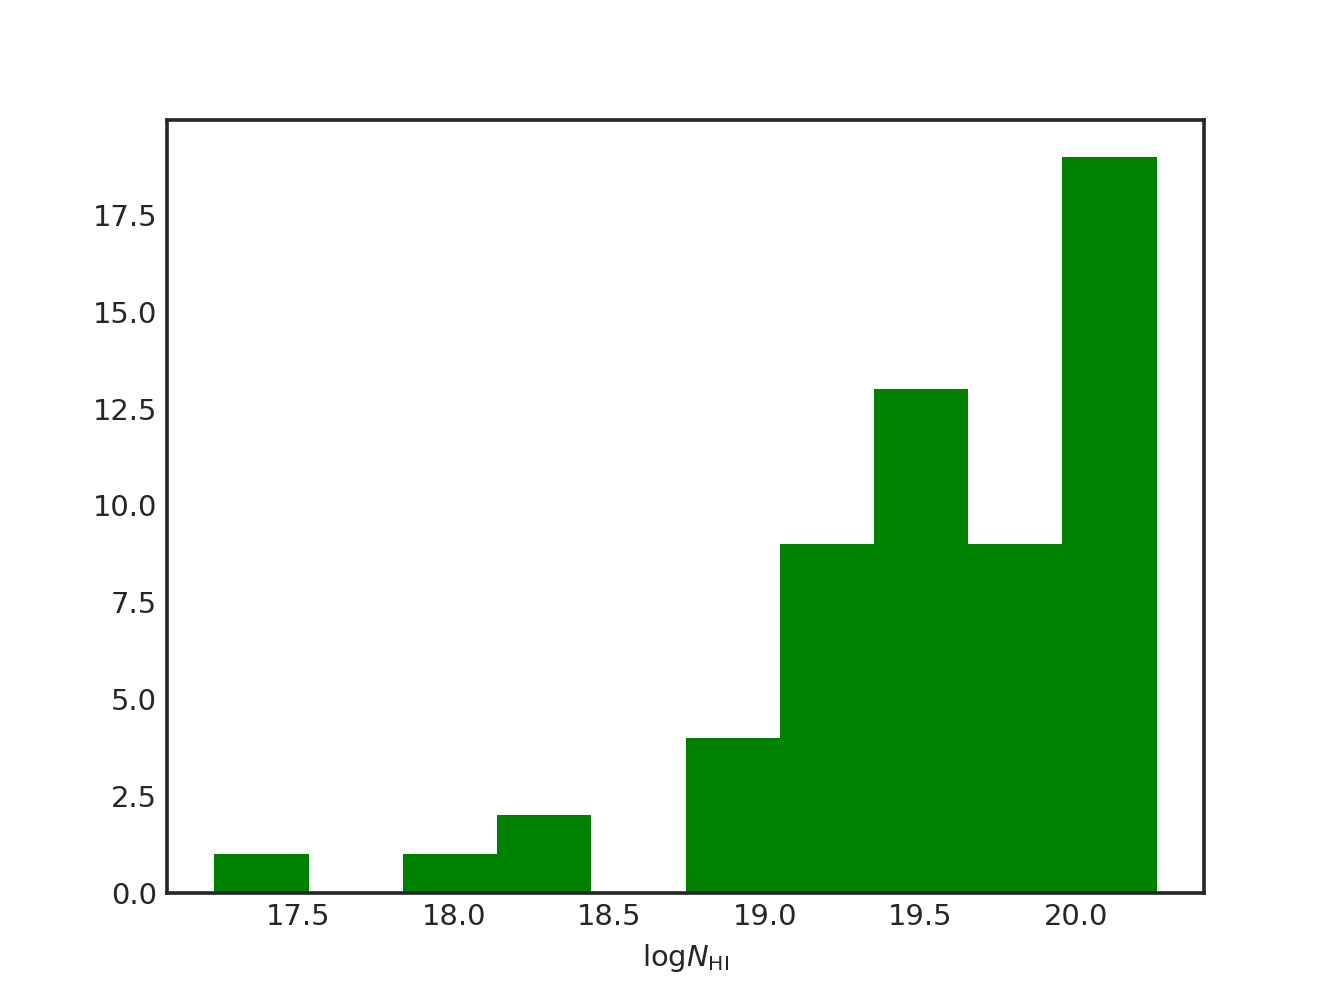

In [55]:
plt.clf()
ax=plt.gca()
ax.hist(lls_lit.NHI, color='g')
ax.set_xlabel(r'$\log N_{\rm HI}$')
plt.show()